Imports

In [71]:
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


In [3]:
x_train = pd.read_csv("Dataset//x_train.csv")
y_train = pd.read_csv("Dataset//y_train.csv")

x_test = pd.read_csv("Dataset//x_test.csv")
y_test = pd.read_csv("Dataset//y_test.csv")


In [2]:
dec_tree = pickle.load(open('Decision_tree.pkl', 'rb'))
rand_for = pickle.load(open('Random_forest.pkl', 'rb'))
svm = pickle.load(open('svm.pkl', 'rb'))
xgb = pickle.load(open('xgb.pkl', 'rb'))

In [4]:
dec_tree.fit(x_train, y_train)
rand_for.fit(x_train, y_train)
svm.fit(x_train, y_train)
xgb.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features=39)

In [6]:
y_pred_dec_tree = dec_tree.predict(x_test)
y_pred_rand_for = rand_for.predict(x_test)
y_pred_svm = svm.predict(x_test)
y_pred_xgb = xgb.predict(x_test)

y_preds = [y_pred_dec_tree, y_pred_rand_for, y_pred_svm, y_pred_xgb]

In [76]:
accs = []
pres = []
res = []
f1s = []

matrixs = []

classifiers = ["Dec_Tree","R_Forest", "SVM", "XGBoost"]

for y_pred in y_preds:

    # print(classification_report(y_test, y_pred))

    accs.append(accuracy_score(y_test, y_pred))
    pres.append(precision_score(y_test, y_pred,average="macro"))
    res.append(recall_score(y_test, y_pred,average="macro"))
    f1s.append(f1_score(y_test, y_pred,average="macro"))


    cm = confusion_matrix(y_test, y_pred)
    matrixs.append(cm)

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


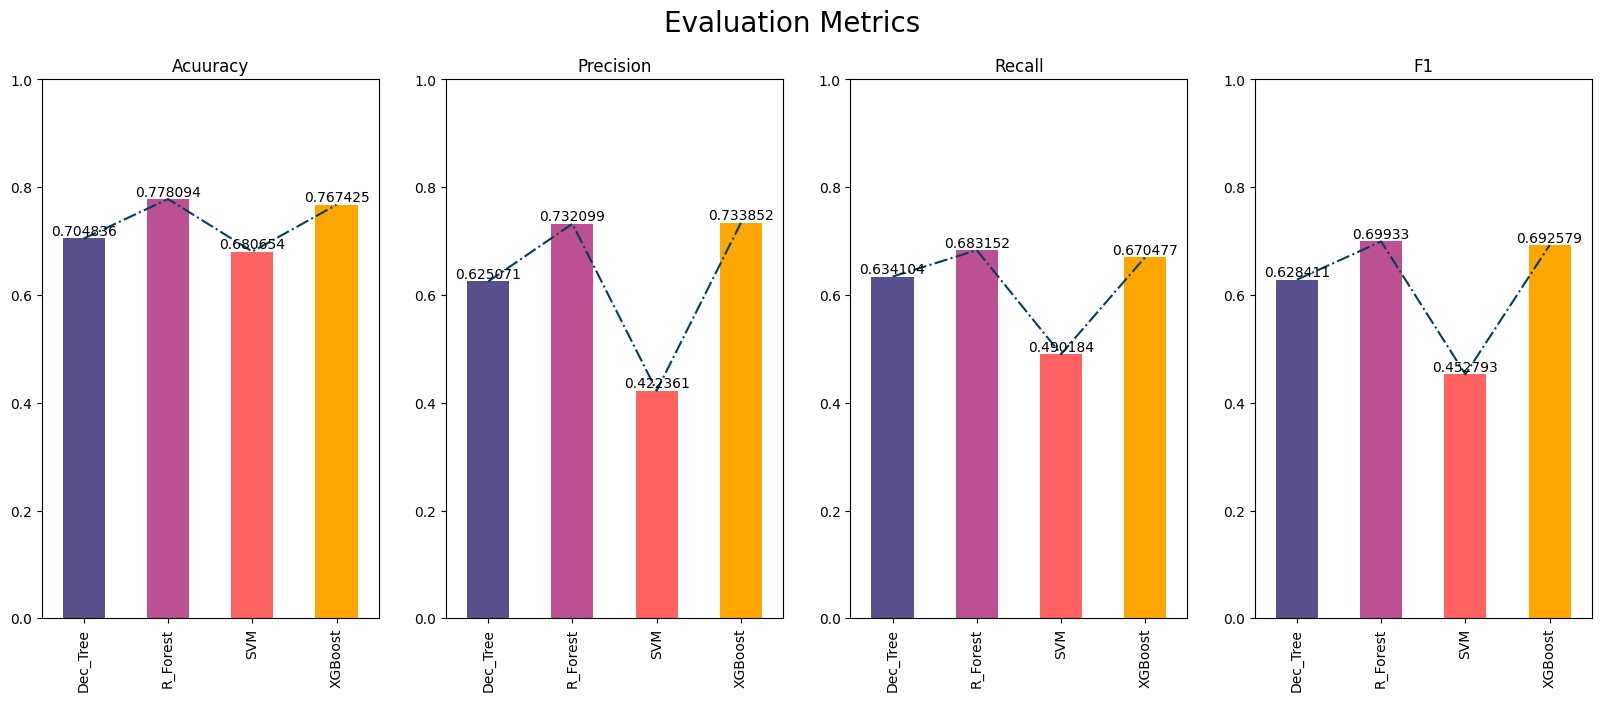

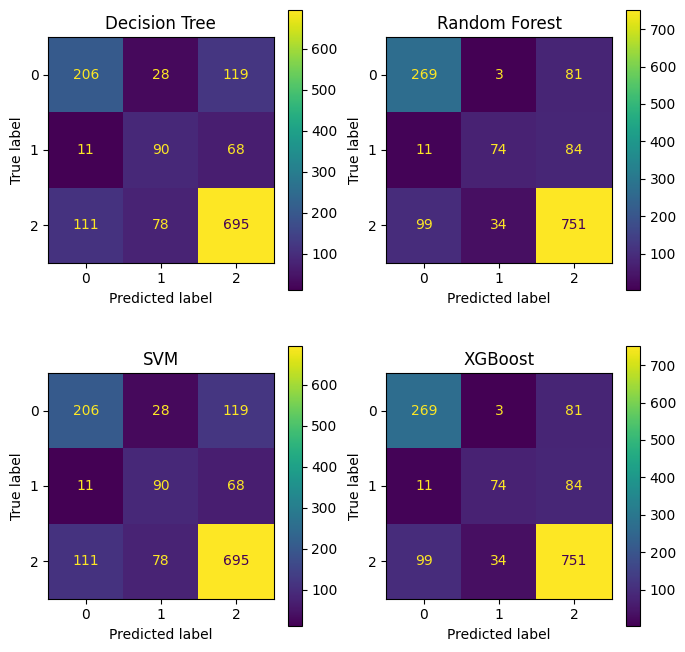

In [106]:

# figure = plt.subplots(1, 4,figsize=(20, 7))
# figure.suptitle("Eval Metrics", fontsize=25)

f, axs = plt.subplots(1, 4, figsize=(20, 7))
plt.suptitle("Evaluation Metrics",fontsize=20)

accs=pd.Series(accs)
plt.subplot(1, 4, 1)
plt.title("Acuuracy")
fig = accs.plot(kind="bar",color=['#58508d', '#bc5090', '#ff6361', '#ffa600'])
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_xticklabels(classifiers)
plt.plot(accs,color="#003f5c",linestyle="dashdot")
plt.ylim([0, 1])


pres=pd.Series(pres)
plt.subplot(1, 4, 2)
plt.title("Precision")
fig = pres.plot(kind="bar",color=['#58508d', '#bc5090', '#ff6361', '#ffa600'])
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_xticklabels(classifiers)
plt.plot(pres,color="#003f5c",linestyle="dashdot")
plt.ylim([0, 1])


res=pd.Series(res)
plt.subplot(1, 4, 3)
plt.title("Recall")
fig = res.plot(kind="bar",color=['#58508d', '#bc5090', '#ff6361', '#ffa600'])
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_xticklabels(classifiers)
plt.plot(res,color="#003f5c",linestyle="dashdot")
plt.ylim([0, 1])


f1s=pd.Series(f1s)
plt.subplot(1, 4, 4)
plt.title("F1")
fig = f1s.plot(kind="bar",color=['#58508d', '#bc5090', '#ff6361', '#ffa600'])
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_xticklabels(classifiers)
plt.plot(f1s,color="#003f5c",linestyle="dashdot")
plt.ylim([0, 1])


f, axes = plt.subplots(2, 2, figsize=(8, 8))

axes[0, 0].set_title("Decision Tree")
ConfusionMatrixDisplay(confusion_matrix=matrixs[0]).plot(ax=axes[0, 0])

axes[0, 1].set_title("Random Forest")
ConfusionMatrixDisplay(confusion_matrix=matrixs[1]).plot(ax=axes[0, 1])

axes[1, 0].set_title("SVM")
ConfusionMatrixDisplay(confusion_matrix=matrixs[0]).plot(ax=axes[1, 0])

axes[1, 1].set_title("XGBoost")
ConfusionMatrixDisplay(confusion_matrix=matrixs[1]).plot(ax=axes[1, 1])


plt.show()
